<img src=images/Imperial_logo_crop_2.png width=300 align=right />

# Professional Certificate in Machine Learning and Artificial Intelligence

# Hyperparameters

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
from torch import nn

## Dataset

In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
y = np.array(pd.get_dummies(y))

We need to change the format of the data so it is compatible with Pytorch.

In [3]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

## Pytorch Sequential model

In [4]:
# Neural network specification.

model = nn.Sequential(nn.Linear(in_features=4, out_features=8),
                      nn.Sigmoid(),
                      nn.Linear(in_features=8, out_features=3),
                      nn.Softmax(dim=1))

loss = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [5]:
# Main training loop.

losses = []
scores = []

niter = 5000
for i in range(niter):
    optimizer.zero_grad()
    
    pred = model.forward(X)
    error = loss(pred, y)
    error.backward()
    optimizer.step()
    
    # Save performance metrics.
    losses.append(error.item()) # Cross-entropy.
    scores.append(torch.sum(torch.argmax(pred, dim=1) == torch.argmax(y, dim=1)) / y.shape[0]) # Accuracy.

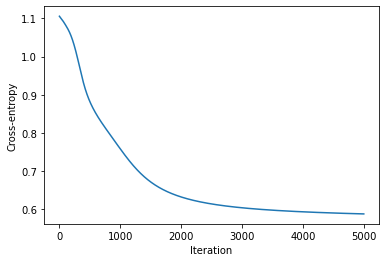

In [6]:
# Learning curve (cross-entropy).

plt.plot(losses)

plt.xlabel('Iteration')
plt.ylabel('Cross-entropy')

plt.show()

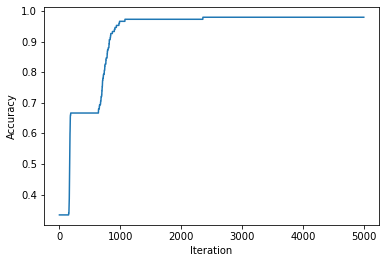

In [7]:
# Learning curve (accuracy).

plt.plot(scores)

plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.show()

In [8]:
# Predicted probabilities.

model.forward(X)

tensor([[9.9403e-01, 5.9743e-03, 3.6214e-07],
        [9.9184e-01, 8.1559e-03, 5.1181e-07],
        [9.9319e-01, 6.8139e-03, 4.2674e-07],
        [9.9068e-01, 9.3171e-03, 6.0544e-07],
        [9.9418e-01, 5.8234e-03, 3.5388e-07],
        [9.9354e-01, 6.4547e-03, 3.8777e-07],
        [9.9283e-01, 7.1695e-03, 4.5491e-07],
        [9.9310e-01, 6.9041e-03, 4.2535e-07],
        [9.8979e-01, 1.0210e-02, 6.8127e-07],
        [9.9195e-01, 8.0532e-03, 5.0468e-07],
        [9.9434e-01, 5.6550e-03, 3.3724e-07],
        [9.9201e-01, 7.9903e-03, 5.0468e-07],
        [9.9211e-01, 7.8872e-03, 4.9672e-07],
        [9.9344e-01, 6.5639e-03, 4.1931e-07],
        [9.9553e-01, 4.4711e-03, 2.6017e-07],
        [9.9525e-01, 4.7546e-03, 2.7789e-07],
        [9.9493e-01, 5.0722e-03, 3.0022e-07],
        [9.9379e-01, 6.2103e-03, 3.7759e-07],
        [9.9382e-01, 6.1765e-03, 3.6539e-07],
        [9.9413e-01, 5.8733e-03, 3.5561e-07],
        [9.9226e-01, 7.7360e-03, 4.6904e-07],
        [9.9363e-01, 6.3744e-03, 3

In [9]:
# Predicted labels.

torch.argmax(model.forward(X), dim=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## Cross-validation

In [10]:
# Dataset.

X, y = load_iris(return_X_y=True)
y = np.array(pd.get_dummies(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [11]:
# Refactoring the training loop.

def train(X, y, niter=5000):
    for i in range(niter):
        optimizer.zero_grad()

        pred = model.forward(X)
        error = loss(pred, y)
        error.backward()
        optimizer.step()

def accuracy(pred, y):
    pred = torch.argmax(pred, dim=1)
    y = torch.argmax(y, dim=1)
    
    return torch.sum(pred == y) / y.shape[0]

def test(X, y):
    pred = model.forward(X)
    
    return accuracy(pred, y)

### Compare different learning rates

In [12]:
learning_rates = np.linspace(0.0001, 0.1, 10) # Step size.
train_scores = []
test_scores = []

for lr in learning_rates:
    model = nn.Sequential(nn.Linear(in_features=4, out_features=8),
                          nn.Sigmoid(),
                          nn.Linear(in_features=8, out_features=3),
                          nn.Softmax(dim=1))

    loss = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
    
    # Train and test the network.
    train(X_train, y_train)
    train_scores.append(test(X_train, y_train))
    test_scores.append(test(X_test, y_test))

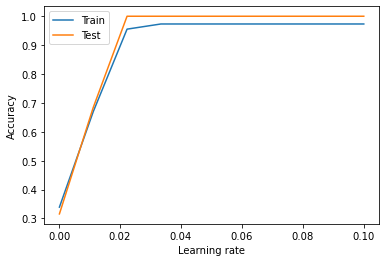

In [13]:
# Learning curves (accuracy).

plt.plot(learning_rates, train_scores)
plt.plot(learning_rates, test_scores)

plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.show()

### Compare different weight decays

In [14]:
weight_decays = np.linspace(0.0001, 0.01, 10) # L2 regularization.
train_scores = []
test_scores = []

for weight_decay in weight_decays:
    model = nn.Sequential(nn.Linear(in_features=4, out_features=8),
                          nn.Sigmoid(),
                          nn.Linear(in_features=8, out_features=3),
                          nn.Softmax(dim=1))

    loss = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(params=model.parameters(), lr=0.05, weight_decay=weight_decay)
    
    # Train and test the network.
    train(X_train, y_train)
    train_scores.append(test(X_train, y_train))
    test_scores.append(test(X_test, y_test))

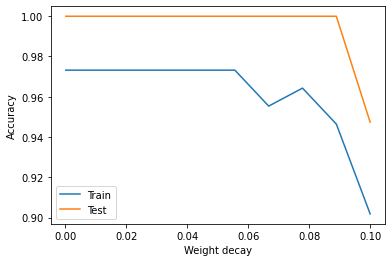

In [15]:
# Learning curves (accuracy).

plt.plot(learning_rates, train_scores)
plt.plot(learning_rates, test_scores)

plt.xlabel('Weight decay')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.show()